In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv("RawData.csv",index_col= "ID")

In [26]:
df.head()

,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore,LTV,DTI,FEDTI
ID,,,,,,,,,,,,
1,3103,317,374,250,268468,32216.16,236251.84,1127.90,778,0.88,0.666742,0.363487
2,2939,368,395,228,335467,30192.03,305274.97,2240.00,546,0.91,1.099354,0.762164
3,4676,222,352,368,461177,36894.16,424282.84,2277.64,736,0.92,0.688546,0.487092
4,8469,224,416,400,326904,22883.28,304020.72,1451.44,761,0.93,0.294183,0.171383
5,2406,497,385,444,472661,23633.05,449027.95,2987.39,615,0.95,1.792764,1.241642


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GrossMonthlyIncome      10000 non-null  int64  
 1   CreditCardPayment       10000 non-null  int64  
 2   CarPayment              10000 non-null  int64  
 3   StudentLoanPayments     10000 non-null  int64  
 4   AppraisedValue          10000 non-null  int64  
 5   DownPayment             10000 non-null  float64
 6   LoanAmount              10000 non-null  float64
 7   MonthlyMortgagePayment  10000 non-null  float64
 8   CreditScore             10000 non-null  int64  
 9   LTV                     10000 non-null  float64
 10  DTI                     10000 non-null  float64
 11  FEDTI                   10000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1015.6 KB


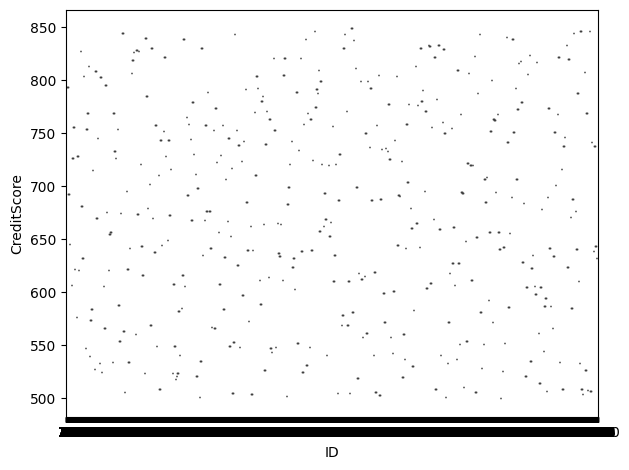

In [14]:
# Checking for outliers in Credit Score
sns.boxplot(df,x="ID",y="CreditScore")

# Show the heatmap
plt.tight_layout()
plt.show()

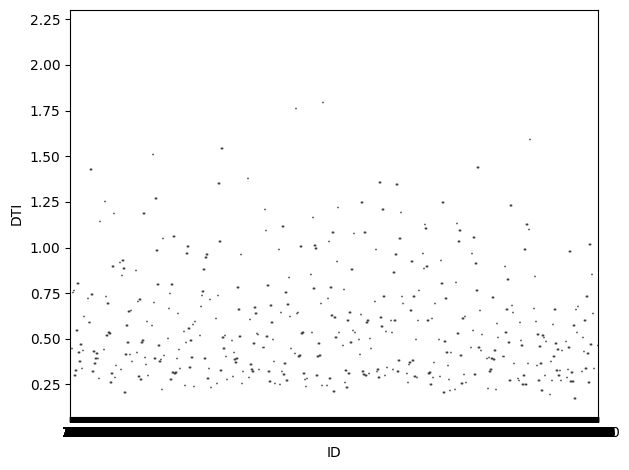

In [6]:
# Checking for outliers in DTI
sns.boxplot(df,x="ID",y="DTI")

# Show the heatmap
plt.tight_layout()
plt.show()

In [28]:
processed_data = df.iloc[:,[8,9,10,11]]
processed_data.head()

,CreditScore,LTV,DTI,FEDTI
ID,,,,
1,778,0.88,0.666742,0.363487
2,546,0.91,1.099354,0.762164
3,736,0.92,0.688546,0.487092
4,761,0.93,0.294183,0.171383
5,615,0.95,1.792764,1.241642


In [84]:
points = [] # 0 - 1
for i in range(len(processed_data)):
    CREDIT = processed_data.iloc[i,:]["CreditScore"]
    LTV = processed_data.iloc[i,:]["LTV"]
    DTI = processed_data.iloc[i,:]["DTI"]
    FEDTI = processed_data.iloc[i,:]["FEDTI"]

    point = 0

    if(CREDIT>=640):
        credit_point = (CREDIT*0.25)/850 #850 is the max credit score
        point+=credit_point


    if(0.80>LTV):
        ltv_point = 0.25
        point+=ltv_point

    if(0.80<=LTV<0.85):
        ltv_point = 0.2
        point+=ltv_point
    
    if(0.85<=LTV<0.90):
        ltv_point = 0.15
        point+=ltv_point
    
    if(0.90<=LTV<0.95):
        ltv_point = 0.1
        point+=ltv_point
    
    if(LTV>=0.95):

        ltv_point = (1.0-LTV)*0.1
        point+=ltv_point
    
    if(0 <=DTI <= 0.43):
        dti_point = ((0.43-DTI)/0.43)*0.1+ 0.15
        point += dti_point
    else:
        point += 0.1 * ((1-DTI))

    if(0<=FEDTI<=0.28):
        fedti_points = (0.15 + ((0.28-FEDTI)/0.28)*0.1)
        point +=fedti_points
    else:
        point += 0.1 * ((1-FEDTI))
    
    if(FEDTI>0.28):
        point+=0

    points.append(point) 

    

In [85]:
processed_data["POINTS"] = points
processed_data[0:20]

C:\Users\saikr\AppData\Local\Temp\ipykernel_8020\487418846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data["POINTS"] = points


,CreditScore,LTV,DTI,FEDTI,POINTS
ID,,,,,
1,778,0.88,0.666742,0.363487,0.475801
2,546,0.91,1.099354,0.762164,0.113848
3,736,0.92,0.688546,0.487092,0.398907
4,761,0.93,0.294183,0.171383,0.694201
5,615,0.95,1.792764,1.241642,-0.098441
6,661,0.71,0.282912,0.188368,0.811344
7,811,0.80,0.256936,0.141414,0.828272
8,648,0.73,0.278479,0.159978,0.818691
9,742,0.95,0.252315,0.147445,0.611899


In [86]:
processed_data.to_csv("ProcessedData.csv", index = False)